### Modelo_cero.
    - Primera toma de contacto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [6]:
df.shape, df.size

((451374, 30), 13541220)

In [7]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [8]:
df.dtypes 

cliente                 int64
saldo_captacion       float64
esta_carterizado       object
cliente_bbp            object
tipo_gestor            object
gestor                float64
cartera_patron         object
codigo_cartera        float64
digital_3_meses        object
camino_digital         object
saldo_financiacion    float64
saldo_ffii            float64
saldo_plp             float64
lp_dom_ingresos         int64
lp_tjta_cto             int64
lp_tjt_rev              int64
lp_rbos                 int64
lp_of_int               int64
marca_bp               object
marca_ccte             object
edad                  float64
seg_valor              object
seg_recorrido          object
dz                      int64
oficina                 int64
lp_seg_vida             int64
lp_seg_acc              int64
lp_seg_salud            int64
lp_seg_hogar            int64
lp_seg_auto             int64
dtype: object

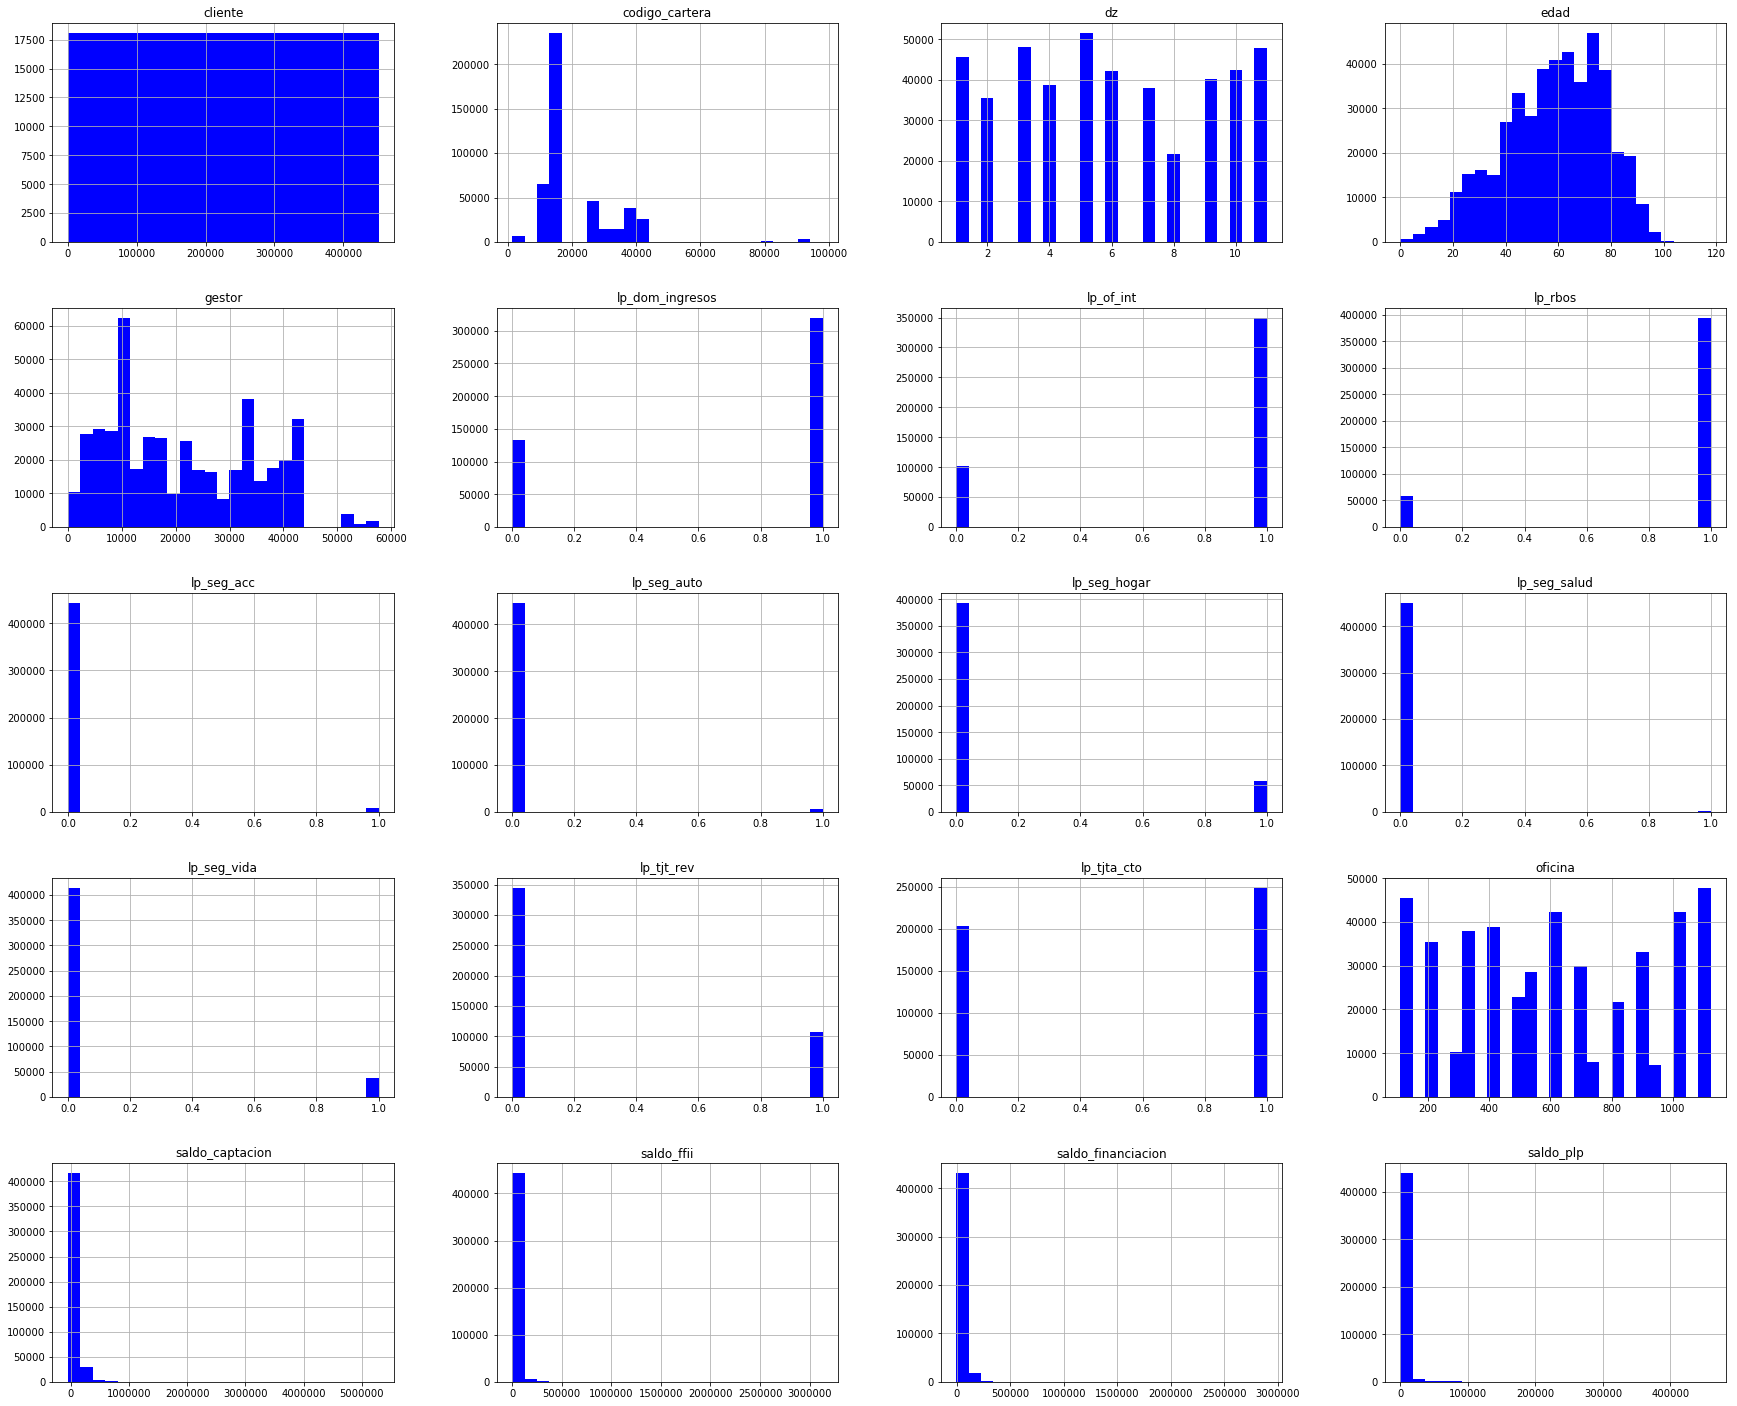

In [9]:
# Visualizamos todas las columnas numericas o categorias.  No se incluyen las columnas de tipo objeto.
df.hist(figsize=(30,25), color = 'b', bins = 25)
plt.show()

### MODELO

In [10]:
# Asignamos Target e Inputs a nuestro modelo

X = df[['saldo_captacion','lp_dom_ingresos']]
y= df['lp_seg_hogar']
X.shape, y.shape


((451374, 2), (451374,))

In [24]:
# Info X,y elegidos
print('================================================')
print('Valores saldo captacion + tipo')
print(pd.value_counts(df['saldo_captacion']).head(3))
print('================================================')
print('Valores lp_dom_ingresos + tipo')
print(pd.value_counts(df['lp_dom_ingresos'],normalize = True))
print('================================================')
print('Valores lp_seg_hogar + tipo')
print(pd.value_counts(df['lp_seg_hogar'], normalize = True))
print('================================================')
# Descripcion estadistica de la variable numerica
print('Descripcion estadistica del input "saldo_captacion"')
df['saldo_captacion'].describe()

Valores saldo captacion + tipo
 0.0     4992
-28.0     202
 50.0     103
Name: saldo_captacion, dtype: int64
Valores lp_dom_ingresos + tipo
1    0.707125
0    0.292875
Name: lp_dom_ingresos, dtype: float64
Valores lp_seg_hogar + tipo
0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64
Descripcion estadistica del input "saldo_captacion"


count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [12]:
# Cargamos la libreria del modelo de clasificacion que hemos eligido inicialmente.  Regresion Logistica.
from sklearn.linear_model import LogisticRegression

In [13]:
# Creamos la instancia del modelo de clasificacion
modelo0 = LogisticRegression()

In [14]:
# Ajustamos el modelo
modelo0.fit(X,y)

LogisticRegression()

In [15]:
# Hacemos las primeras predicciones
modelo0.predict(X)


array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# Cargamos la libreria para poder entrenar nuestro modelo
from sklearn.model_selection import train_test_split

In [17]:
# Creamos dos grupos con Input y etiquetas  
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [18]:
# Ajustamos y entrenamos solo con el grupo de Entreamiento
modelo0.fit(X_train,y_train)

LogisticRegression()

In [19]:
#  Haemos las prediciones de todo el X_test
modelo0.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
modelo0.predict_proba(X_test)[:,1]

array([0.46033611, 0.47997684, 0.47331014, ..., 0.48913854, 0.49827027,
       0.4287873 ])

In [21]:
# Cargamos librerias de metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

[[76618  1908]
 [11679    70]]


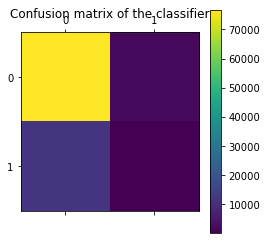

In [26]:
# Imprimimos matriz de confusion para ver los datos iniciales y luego sacar las metricas
matriz_confusion_modelo0 = confusion_matrix(y_test,modelo0.predict(X_test))
print(matriz_confusion_modelo0)
pl.matshow(matriz_confusion_modelo0)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


In [28]:
# Resultados de metricas
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo0.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo0.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo0.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo0.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo0.predict_proba(X_test)[:,1])) 
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo0.predict(X_test)))

accuracy_score =  0.8494932151758515
precision = 0.03538928210313448
recall = 0.005957953868414333
f1_score = 0.010198878123406425
roc_auc_score = 0.3902287629399761
classification_report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     78526
           1       0.04      0.01      0.01     11749

    accuracy                           0.85     90275
   macro avg       0.45      0.49      0.46     90275
weighted avg       0.76      0.85      0.80     90275



Text(0, 0.5, 'tpr')

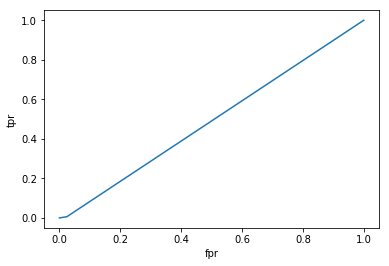

In [29]:
fpr, tpr, threshold = roc_curve(y_test,modelo0.predict(X_test))
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')